# **Assignment_2**

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# **Helper Function**

In [2]:
def generate_wave_data(num_samples, sequence_length, noise=0.1):
  # Generate random frequency components with random amplitudes signal
  x = np.linspace(0, num_samples * np.pi, num_samples)
  # Change here: Generate a single frequency instead of an array
  frequency = np.random.uniform(1, 100, 2)
  amplitudes = np.random.rand(2)
  # Change here: use frequency directly instead of frequencies[0]
  signal = (amplitudes[0] * (frequency[0] * np.cos(2 * np.pi * x))) +  (amplitudes[1] * (frequency[1] * np.cos(2 * np.pi * x)))
  # Add some noise
  noise = noise * np.random.randn(num_samples)
  signal += noise
  return signal, signal - noise

In [4]:
signal, noise_signal = generate_wave_data(4096, 128)

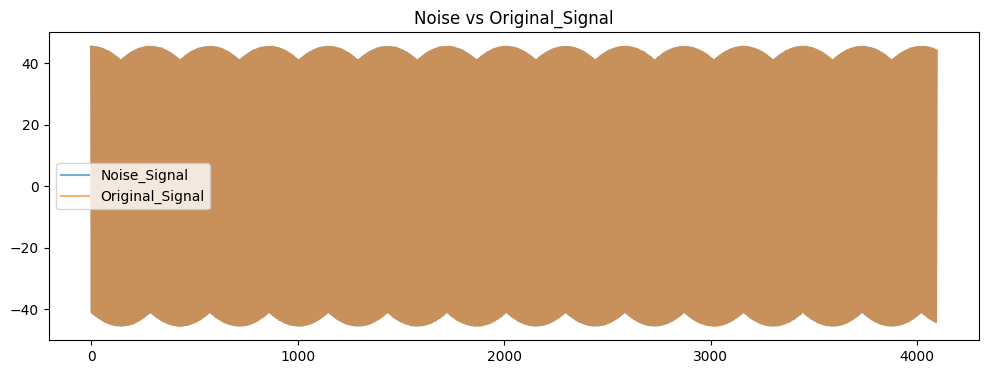

In [5]:
plt.figure(figsize=(12, 4))
plt.plot(noise_signal, label='Noise_Signal', alpha=0.6)
plt.plot(signal, label='Original_Signal', alpha=0.6)
plt.legend()
plt.title("Noise vs Original_Signal")
plt.show()

In [6]:
X = noise_signal.reshape(-1, 128, 1)

Y = signal.reshape(-1, 128, 1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# **Auto_Encoder**

In [ ]:


input_layer = Input(shape=(128, 1))

# TCN Encoder
x = Conv1D(filters=32, kernel_size=3, activation='relu', dilation_rate=1, padding='causal')(input_layer)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(filters=64, kernel_size=3, activation='relu', dilation_rate=2, padding='causal')(x)
encoded = MaxPooling1D(pool_size=2)(x)

encoded.shape


(None, 32, 64)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


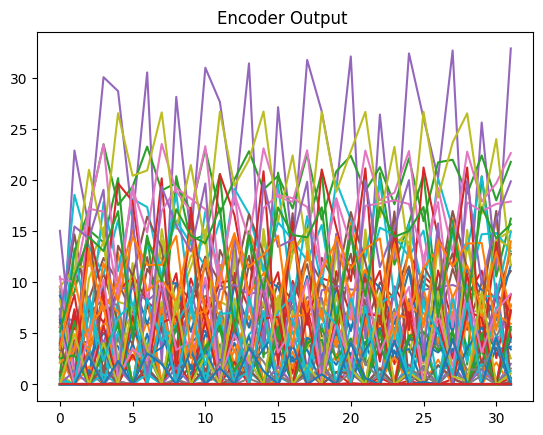

In [ ]:
encoded_model = Model(inputs=input_layer, outputs=encoded)
encoded_output = encoded_model.predict(X_test)
plt.plot(encoded_output[0])
plt.title("Encoder Output ")
plt.show()


In [ ]:
# TCN Decoder
x = UpSampling1D(size=2)(encoded)
x = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(x)

x = UpSampling1D(size=2)(x)
decoded = Conv1D(filters=1, kernel_size=3, activation='linear', padding='same')(x)


In [ ]:
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 128, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 128, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 64, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 64, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 32, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_4 (UpSampling1D)  │ (None, 64, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_12 (Conv1D)              │ (None, 64, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_5 (UpSampling1D)  │ (None, 128, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 128, 1)         │           193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,881 (73.75 KB)

 Trainable params: 18,881 (73.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = autoencoder.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 68.0461 - val_loss: 84.3821
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - loss: 65.4529 - val_loss: 82.3144
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 62.4149 - val_loss: 80.1506
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 59.3787 - val_loss: 78.0125
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 56.6575 - val_loss: 76.1199
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 54.4085 - val_loss: 74.5997
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 52.7131 - val_loss: 73.4656
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 51.4962 - val_loss: 72.5451
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 50.5937 - val_loss: 71.7204
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 49.8280 - val_loss: 70.7886
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 49.0058 - val_loss: 69.7223
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10

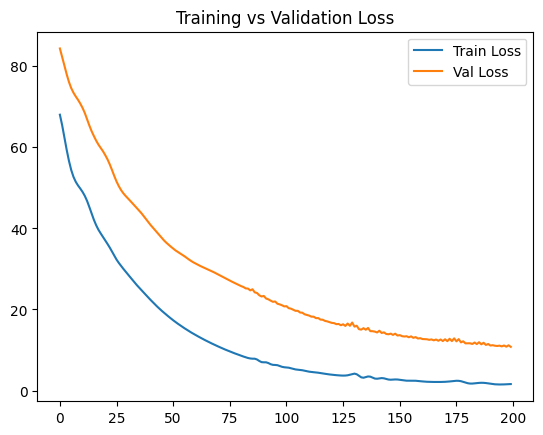

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


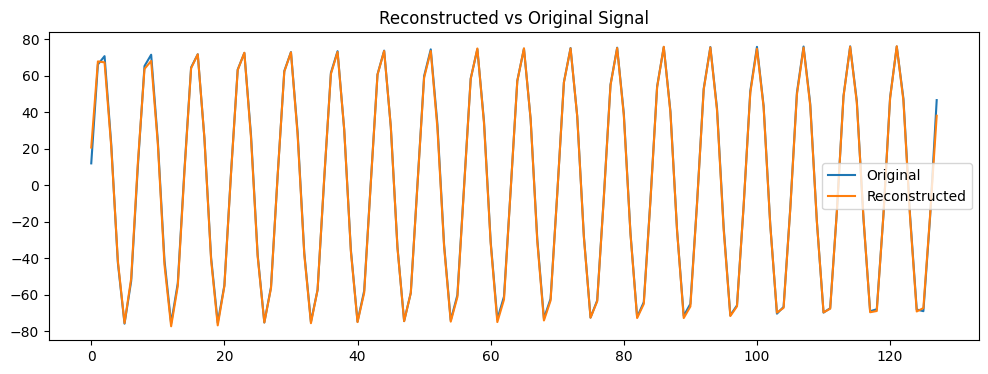

In [ ]:
reconstructed = autoencoder.predict(X_test)

# Display one example
idx = 3
plt.figure(figsize=(12, 4))
plt.plot(y_test[idx], label='Original')
plt.plot(reconstructed[idx], label='Reconstructed')
plt.legend()
plt.title("Reconstructed vs Original Signal")
plt.show()


In [ ]:
mae = mean_absolute_error(y_test.flatten(), reconstructed.flatten())
mse = mean_squared_error(y_test.flatten(), reconstructed.flatten())

mae


9.543512222275568

In [ ]:
mse


9.543512222275568